In [126]:
# 데이터 분석을 위해 pandas를, 수치계산을 위해 numpy를, 시각화를위해 mapplotlib,seaborn 를 불러온다
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [127]:
# 한글설정 & 마이너스표시
plt.rc('font',family='Malgun Gothic') 
plt.rc('axes',unicode_minus=False)

In [128]:
# 데이터 불러오기
track_info = pd.read_csv('트랙정보.csv',encoding='cp949')
track_point = pd.read_csv('트랙포인트정보1.csv', encoding='cp949')

In [129]:
# 데이터 합치기
df = pd.merge(track_point, track_info, left_on = 'PRNTS_TRK_IDNO', right_on = 'TRK_IDNO', how = 'inner')
df.shape

(49267, 52)

In [130]:
# 결측치 확인
df.isnull().sum()

TRK_PNT_IDNO              0
TRK_PNT_TABLE_NO          0
PRNTS_TRK_IDNO            0
TRK_PNT_SRTNG_ORDR        0
TRK_PNT_LNGTD             0
TRK_PNT_LTTD              0
TRK_PNT_HASLV             0
TRK_PNT_XCRD              0
TRK_PNT_YCRD              0
TRK_PNT_RCRD_DTM          0
DATA_STCD_x               0
DATA_RGSTN_DTM_x          0
DATA_UPDT_DTM_x           0
DATA_CONNO_x              0
OPERT_TPCD_x              0
OCCRR_DTM_x               0
CNTCT_BGN_DTM_x       49267
CNTCT_PRCES_DTM_x     49267
CNTCT_PRCES_STCD_x    49267
TRNSA_ID_x            49267
TRK_IDNO                  0
TRK_NM                    0
TRK_SNNM                  0
TRK_LNGTH                 0
TRK_CTPRV_NM              0
TRK_EMNDN_NM              0
TRK_LTNO              49267
TRK_ARA_NM            45123
TRK_RQRMN_TM              0
TRK_RST_TM                0
TRK_SPRT_ITE_IDNO         0
TRK_BGN_LCTN_LNGTD        0
TRK_BGN_LCTN_LTTD         0
TRK_END_LCTN_LNGTD        0
TRK_END_LCTN_LTTD         0
TRK_AVRG_GRDNT      

In [131]:
# 결측치, 중복 컬럼 제거
df = df.drop(columns=['CNTCT_BGN_DTM_x', 'CNTCT_PRCES_DTM_x', 'CNTCT_PRCES_STCD_x', 'TRNSA_ID_x', 'TRK_LTNO', 'TRK_ARA_NM', 'DATA_STCD_y', 'DATA_RGSTN_DTM_y', 'DATA_UPDT_DTM_y', 'DATA_CONNO_y', 'OPERT_TPCD_y', 'OCCRR_DTM_y'])
df.shape

(49267, 40)

In [132]:
# 컬럼명 변경
col_names = ['트랙포인트고유번호', '트랙포인트테이블번호', '부모트랙고유번호', '트랙포인트정렬순서', '트랙포인트경도', '트랙포인트위도', '트랙포인트해발고도', '트랙포인트X좌표', '트랙포인트Y좌표', '트랙포인트기록일시', '데이터상태코드', '데이터등록일시', '데이터수정일시', '데이터일련번호', '작업구분코드', '발생일시', '트랙고유번호', '트랙명', '트랙이명', '트랙길이', '트랙시도명', '트랙읍면동명', '트랙소요시간', '트랙휴식시간', '트랙운동종목고유번호', '트랙시작위치경도', '트랙시작위치위도', '트랙종료위치경도', '트랙종료위치위도', '트랙평균경사도', '트랙최고해발고도', '트랙최저해발고도', '트랙오름길이', '트랙평지길이', '트랙내림길이', '트랙난이도값', '연계시작일시', '연계처리일시', '연계처리상태코드', '트랜젝션ID']
# col_names

In [133]:
df.columns = col_names

In [134]:
# 필요없는 컬럼 제거
df = df.drop(columns=['트랙포인트테이블번호', '부모트랙고유번호', '트랙포인트정렬순서', '트랙포인트기록일시', '데이터상태코드', '데이터등록일시', '데이터수정일시', '데이터일련번호', '작업구분코드', '발생일시', '트랙운동종목고유번호', '연계시작일시', '연계처리일시', '연계처리상태코드', '트랜젝션ID'])
df.columns

Index(['트랙포인트고유번호', '트랙포인트경도', '트랙포인트위도', '트랙포인트해발고도', '트랙포인트X좌표', '트랙포인트Y좌표',
       '트랙고유번호', '트랙명', '트랙이명', '트랙길이', '트랙시도명', '트랙읍면동명', '트랙소요시간', '트랙휴식시간',
       '트랙시작위치경도', '트랙시작위치위도', '트랙종료위치경도', '트랙종료위치위도', '트랙평균경사도', '트랙최고해발고도',
       '트랙최저해발고도', '트랙오름길이', '트랙평지길이', '트랙내림길이', '트랙난이도값'],
      dtype='object')

Text(0.5, 1.0, '지역별 등산로의 수')

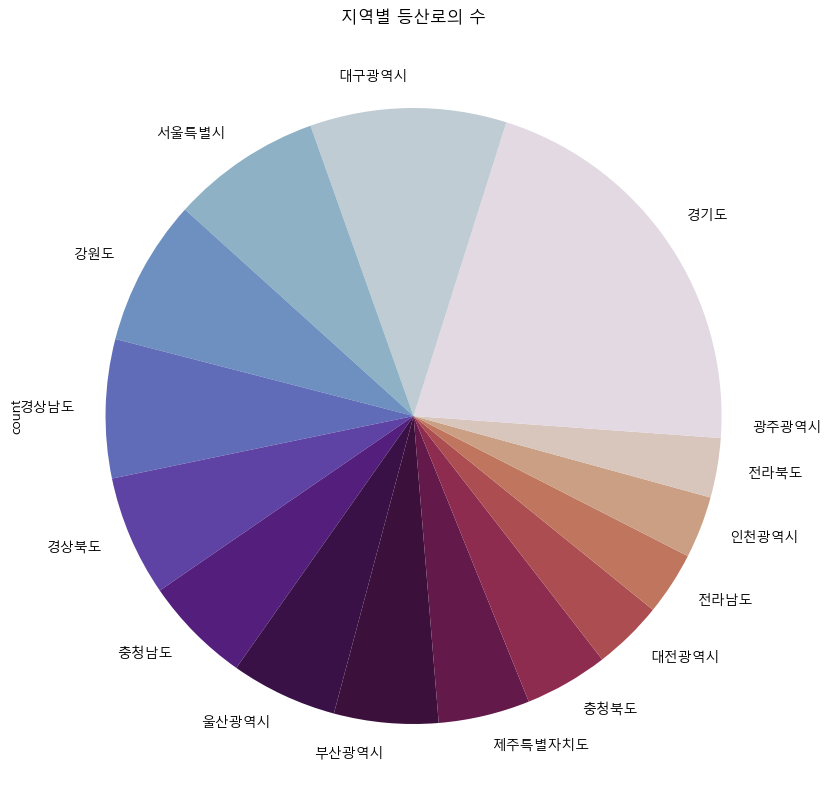

In [135]:
plt.figure(figsize=(20,10))
df['트랙시도명'].value_counts().plot.pie(cmap='twilight')
plt.title('지역별 등산로의 수')

Text(0.5, 1.0, '지역 등산 소요 시간 평균')

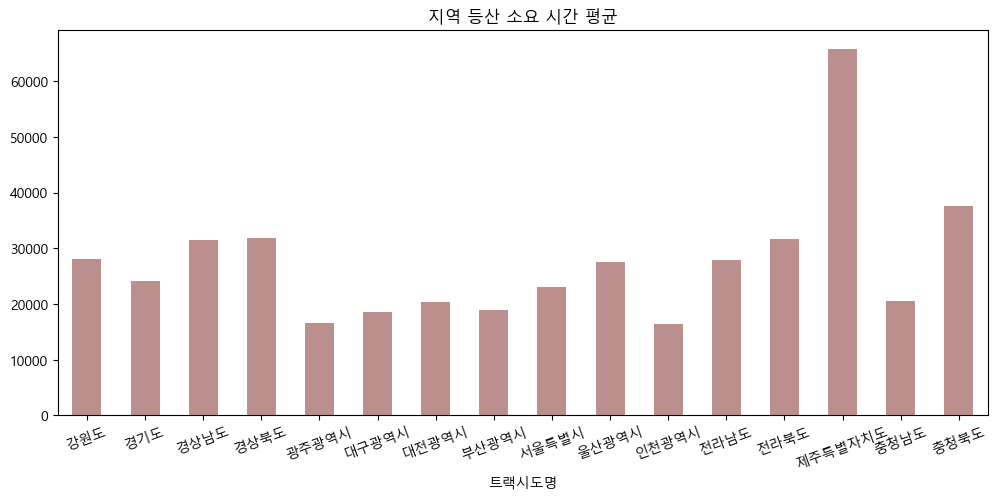

In [136]:
plt.figure(figsize=(12,5))
c_avg = df.groupby('트랙시도명')['트랙소요시간'].mean()
c_avg.plot.bar(rot=20, color='rosybrown')
plt.title('지역 등산 소요 시간 평균')

Text(0.5, 1.0, '지역별 등산로 길이 합')

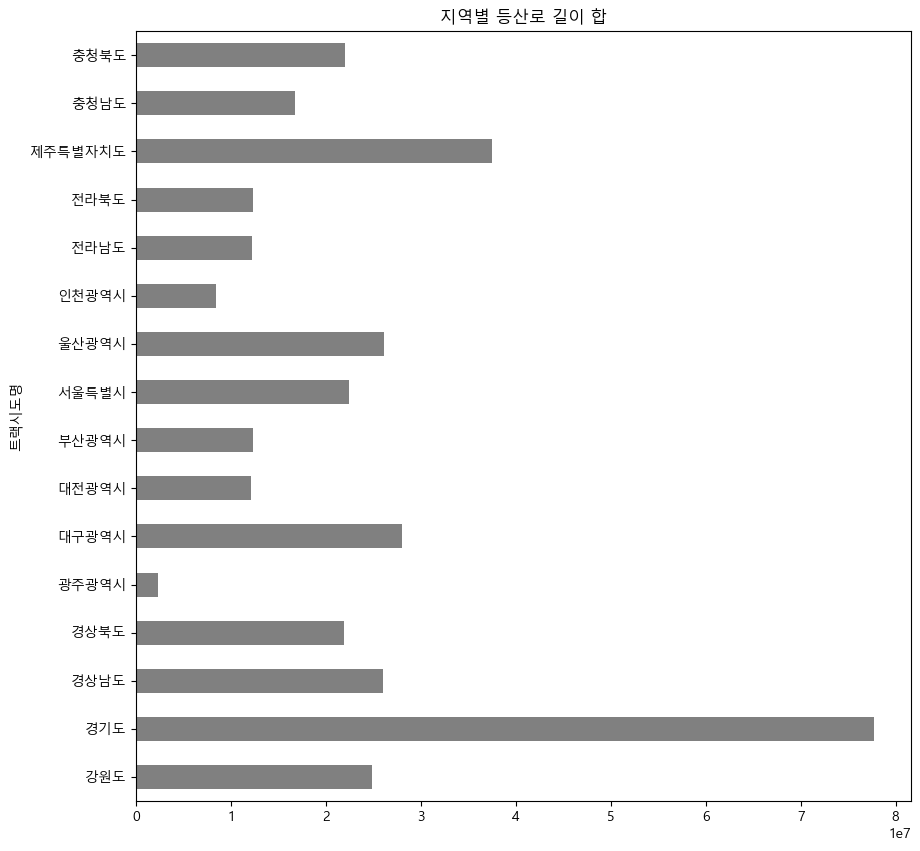

In [137]:
plt.figure(figsize=(10,10))
t_sum = df.groupby('트랙시도명')['트랙길이'].sum()
t_sum.plot.barh(color='grey')
plt.title('지역별 등산로 길이 합')

Text(0.5, 1.0, '지역별 등산로 평균 경사도')

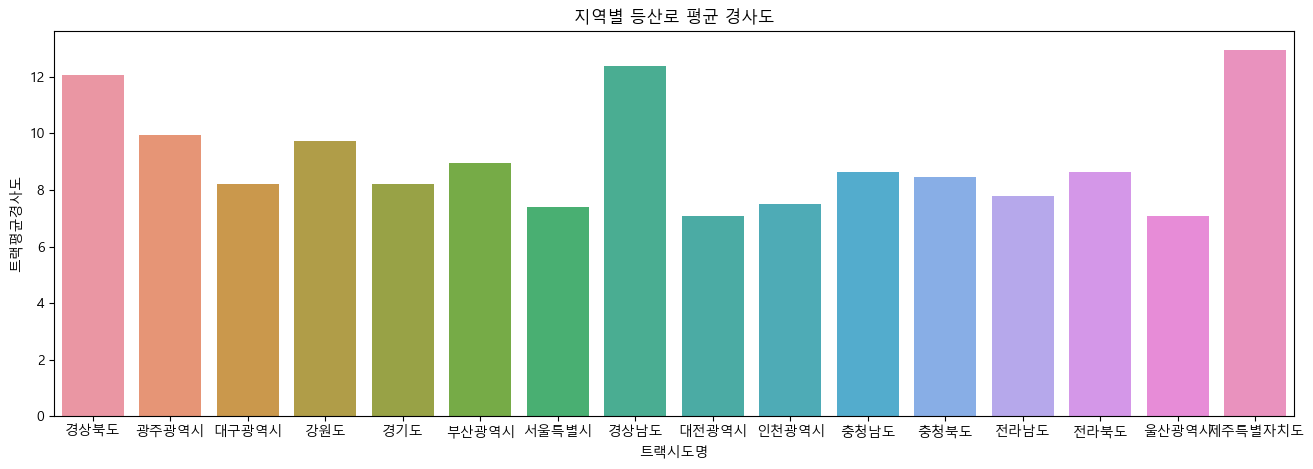

In [138]:
plt.figure(figsize=(16,5))
sns.barplot(data=df, x='트랙시도명', y='트랙평균경사도', errorbar=None)
plt.title('지역별 등산로 평균 경사도')

Text(0.5, 1.0, '등산로 평균 경사도 분포')

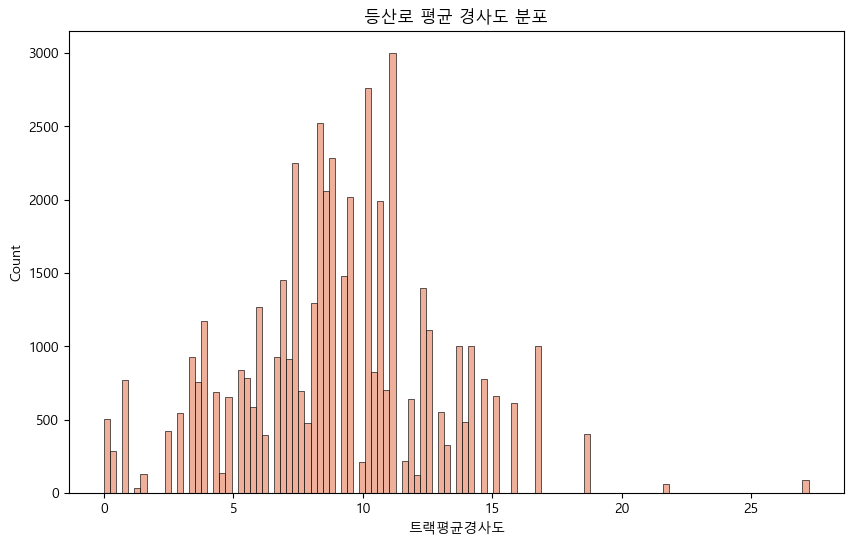

In [139]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df['트랙평균경사도'], color='darksalmon')
plt.title('등산로 평균 경사도 분포')

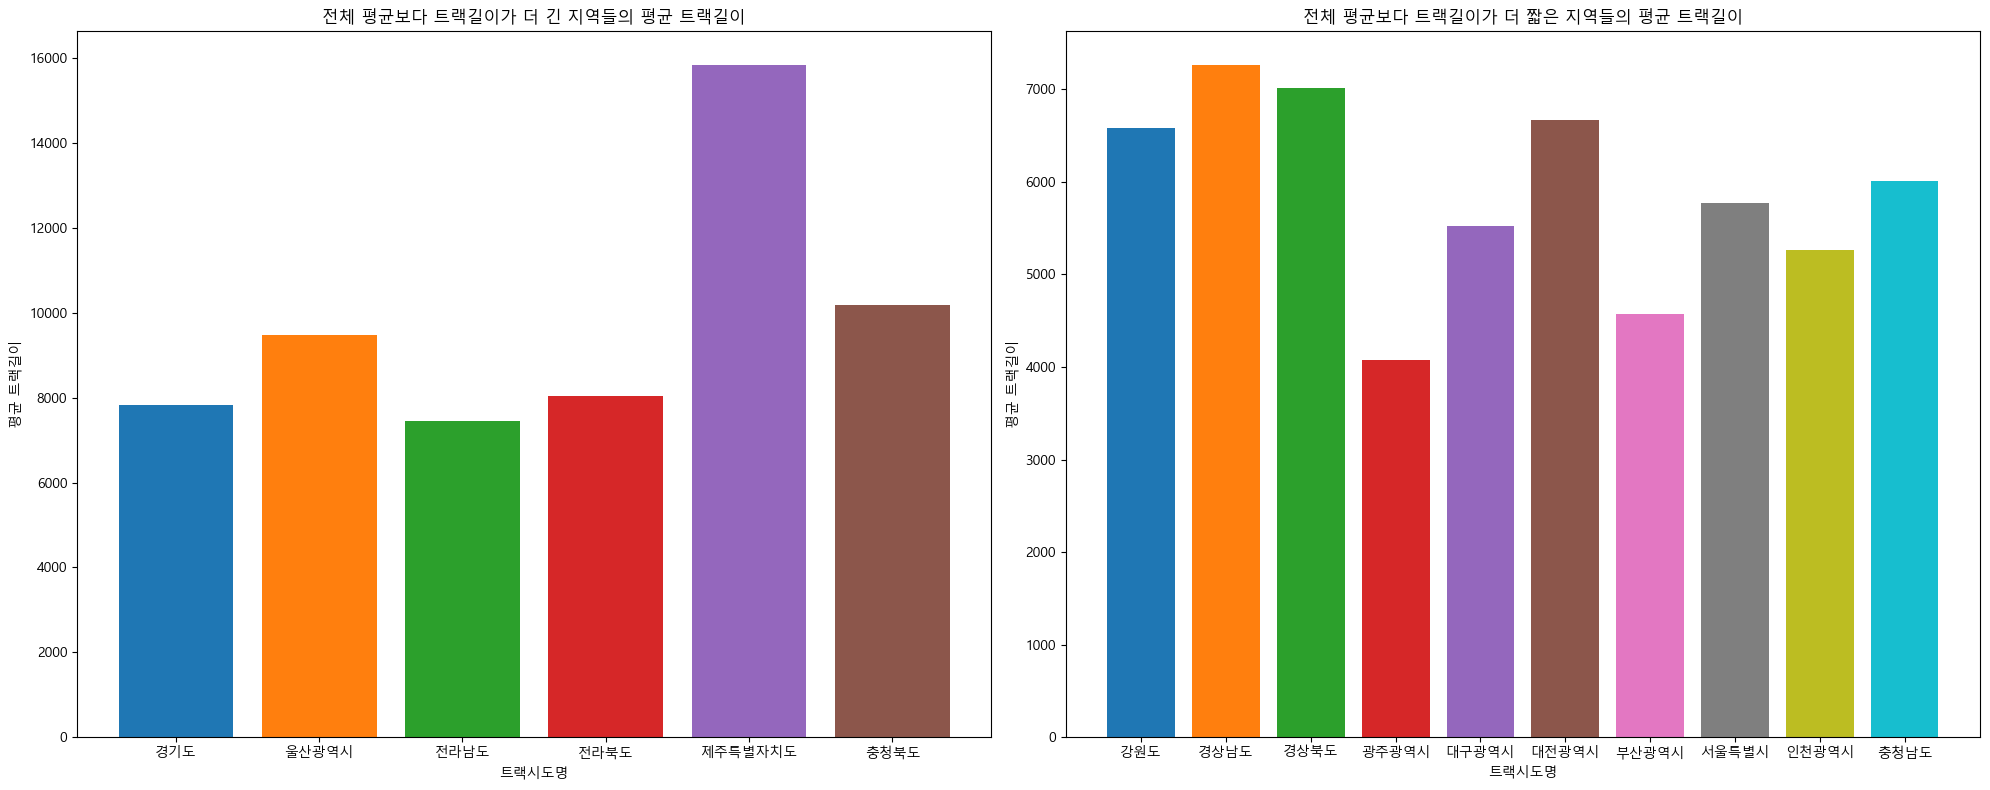

In [140]:
plt.figure(figsize=(20, 8))

# 첫 번째 서브플롯
plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째 위치
avg_of_all = df['트랙길이'].mean()
avg_by_group = df.groupby('트랙시도명')['트랙길이'].mean()
larger_than_avg = avg_by_group > avg_of_all

for group_name, is_larger in larger_than_avg.items():
    if is_larger:
        group_data = df[df['트랙시도명'] == group_name]
        plt.bar(group_name, group_data['트랙길이'].mean())

plt.title('전체 평균보다 트랙길이가 더 긴 지역들의 평균 트랙길이')
plt.xlabel('트랙시도명')
plt.ylabel('평균 트랙길이')

# 두 번째 서브플롯
plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째 위치
avg_of_all = df['트랙길이'].mean()
avg_by_group = df.groupby('트랙시도명')['트랙길이'].mean()
shorter_than_avg = avg_by_group < avg_of_all

for group_name, is_shorter in shorter_than_avg.items():
    if is_shorter:
        group_data = df[df['트랙시도명'] == group_name]
        plt.bar(group_name, group_data['트랙길이'].mean())

plt.title('전체 평균보다 트랙길이가 더 짧은 지역들의 평균 트랙길이')
plt.xlabel('트랙시도명')
plt.ylabel('평균 트랙길이')

plt.tight_layout()  # 서브플롯 간의 간격을 자동으로 조정하여 레이아웃을 최적화합니다.
plt.show()


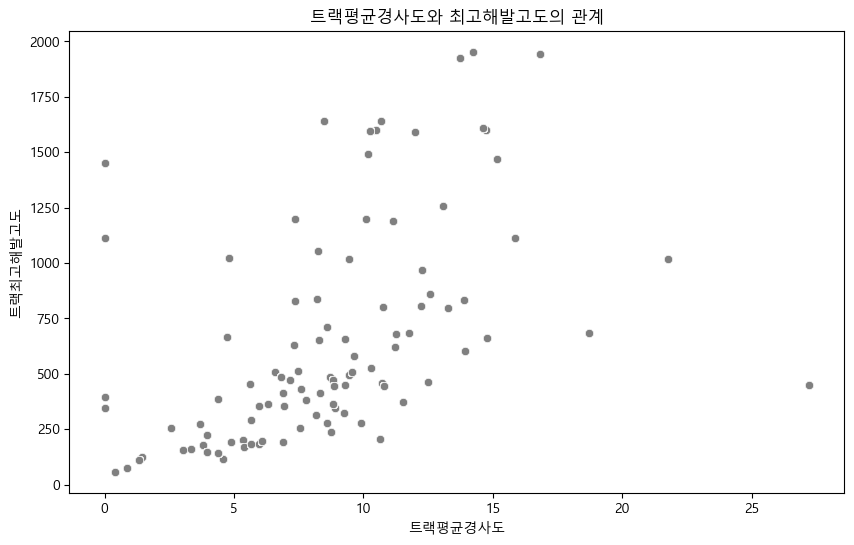

In [141]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='트랙평균경사도', y='트랙최고해발고도', color='grey')
plt.title('트랙평균경사도와 최고해발고도의 관계')
plt.xlabel('트랙평균경사도')
plt.ylabel('트랙최고해발고도')
plt.show()

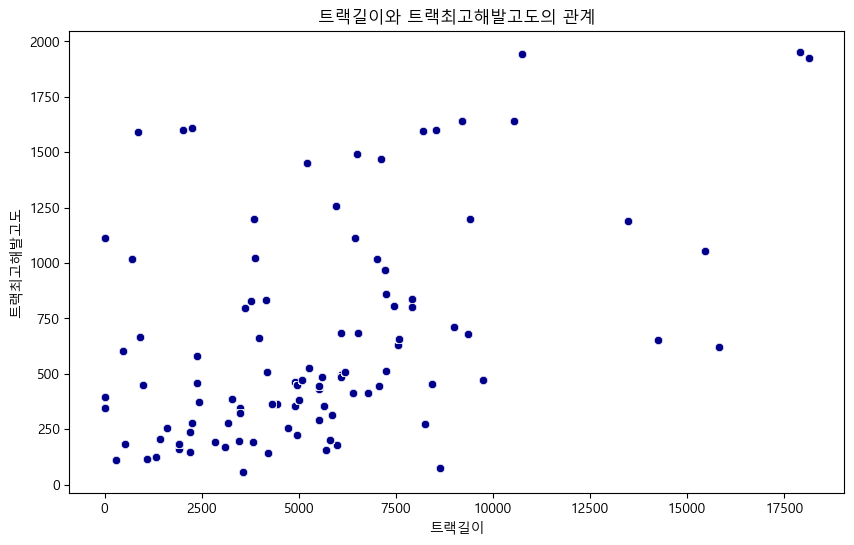

In [142]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='트랙길이', y='트랙최고해발고도', color='darkblue')
plt.title('트랙길이와 트랙최고해발고도의 관계')
plt.xlabel('트랙길이')
plt.ylabel('트랙최고해발고도')
plt.show()

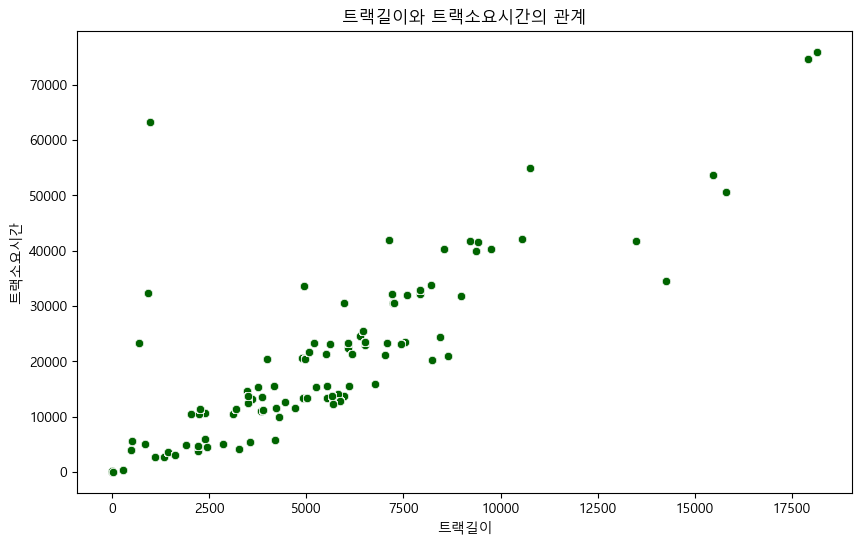

In [143]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='트랙길이', y='트랙소요시간', color='darkgreen')
plt.title('트랙길이와 트랙소요시간의 관계')
plt.xlabel('트랙길이')
plt.ylabel('트랙소요시간')
plt.show()

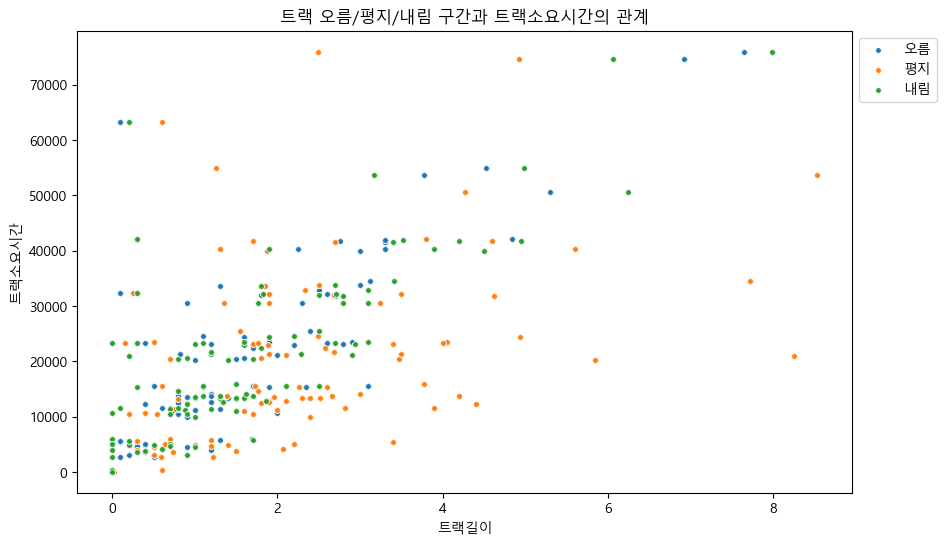

In [144]:
'트랙오름길이', '트랙평지길이', '트랙내림길이'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='트랙오름길이', y='트랙소요시간', label='오름', s=15)
sns.scatterplot(data=df, x='트랙평지길이', y='트랙소요시간', label='평지', s=15)
sns.scatterplot(data=df, x='트랙내림길이', y='트랙소요시간', label='내림', s=15)
plt.title('트랙 오름/평지/내림 구간과 트랙소요시간의 관계')
plt.xlabel('트랙길이')
plt.ylabel('트랙소요시간')
plt.legend(bbox_to_anchor=(1,1),loc=0 )
plt.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, '트랙내림길이'),
  Text(1.5, 0, '트랙소요시간'),
  Text(2.5, 0, '트랙오름길이'),
  Text(3.5, 0, '트랙최고해발고도'),
  Text(4.5, 0, '트랙최저해발고도'),
  Text(5.5, 0, '트랙평균경사도'),
  Text(6.5, 0, '트랙평지길이'),
  Text(7.5, 0, '트랙포인트해발고도'),
  Text(8.5, 0, '트랙휴식시간')])

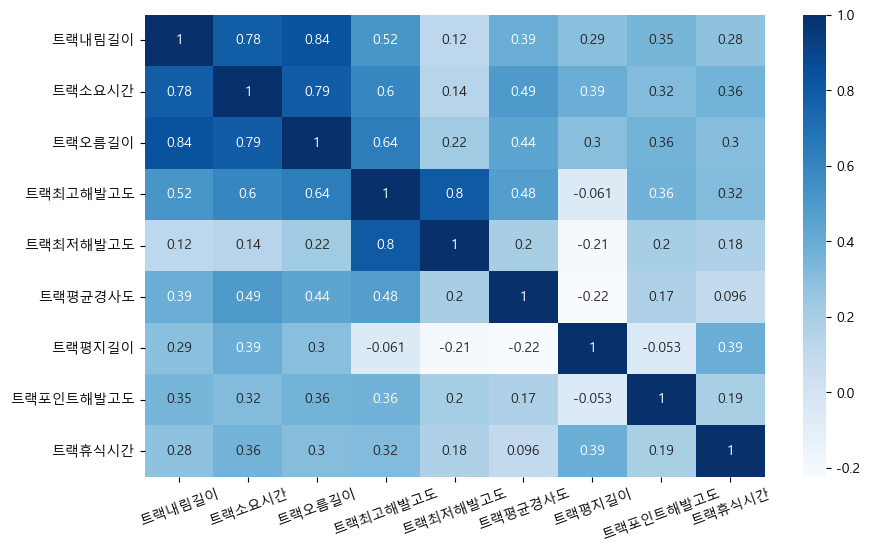

In [145]:
plt.figure(figsize=(10, 6))

# 숫자형 열만 선택
numeric_columns = ['트랙포인트해발고도','트랙길이', '트랙소요시간', '트랙휴식시간', '트랙평균경사도', '트랙최고해발고도', '트랙최저해발고도', '트랙오름길이', '트랙평지길이', '트랙내림길이']
h_df_numeric = df[numeric_columns]

# 집계 연산을 수행
h_df_mean = pd.pivot_table(data=h_df_numeric, index='트랙길이')
sns.heatmap(data=h_df_mean.corr(), cmap='Blues', annot=True)

plt.xticks(rotation=20)

D:\kdt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


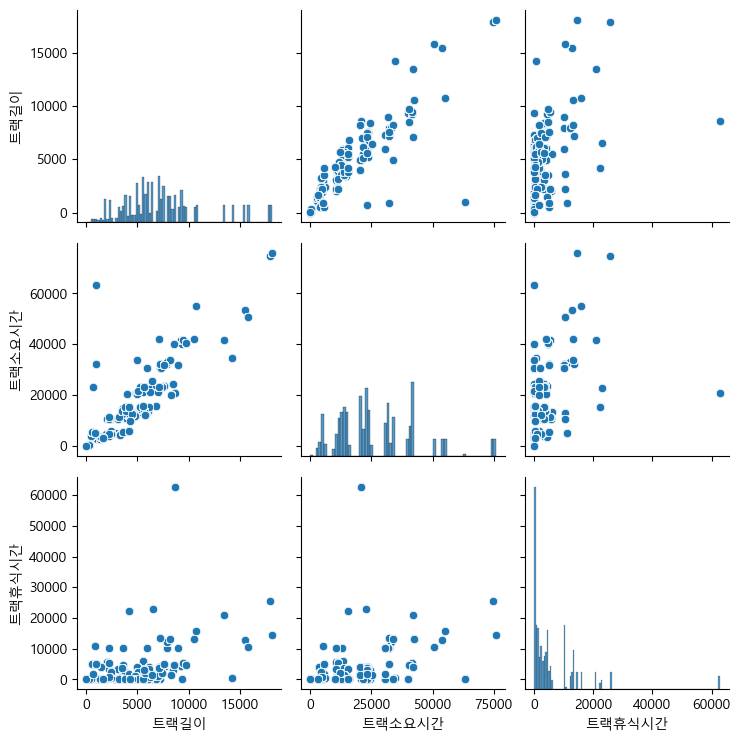

In [146]:
sns.pairplot(df[['트랙길이', '트랙소요시간', '트랙휴식시간']])
plt.subplots_adjust(hspace=.1)

In [147]:
df.columns

Index(['트랙포인트고유번호', '트랙포인트경도', '트랙포인트위도', '트랙포인트해발고도', '트랙포인트X좌표', '트랙포인트Y좌표',
       '트랙고유번호', '트랙명', '트랙이명', '트랙길이', '트랙시도명', '트랙읍면동명', '트랙소요시간', '트랙휴식시간',
       '트랙시작위치경도', '트랙시작위치위도', '트랙종료위치경도', '트랙종료위치위도', '트랙평균경사도', '트랙최고해발고도',
       '트랙최저해발고도', '트랙오름길이', '트랙평지길이', '트랙내림길이', '트랙난이도값'],
      dtype='object')

In [ ]:
plt.figure(figsize=(16,10))
fall = df['트랙최고해발고도'] - df['트랙최저해발고도']
sns.histplot(data=fall, color='slategrey')
plt.title('트랙 해발고도의 최고최저 높이 차 분포')

Text(0.5, 1.0, '등산로 타입 분포')

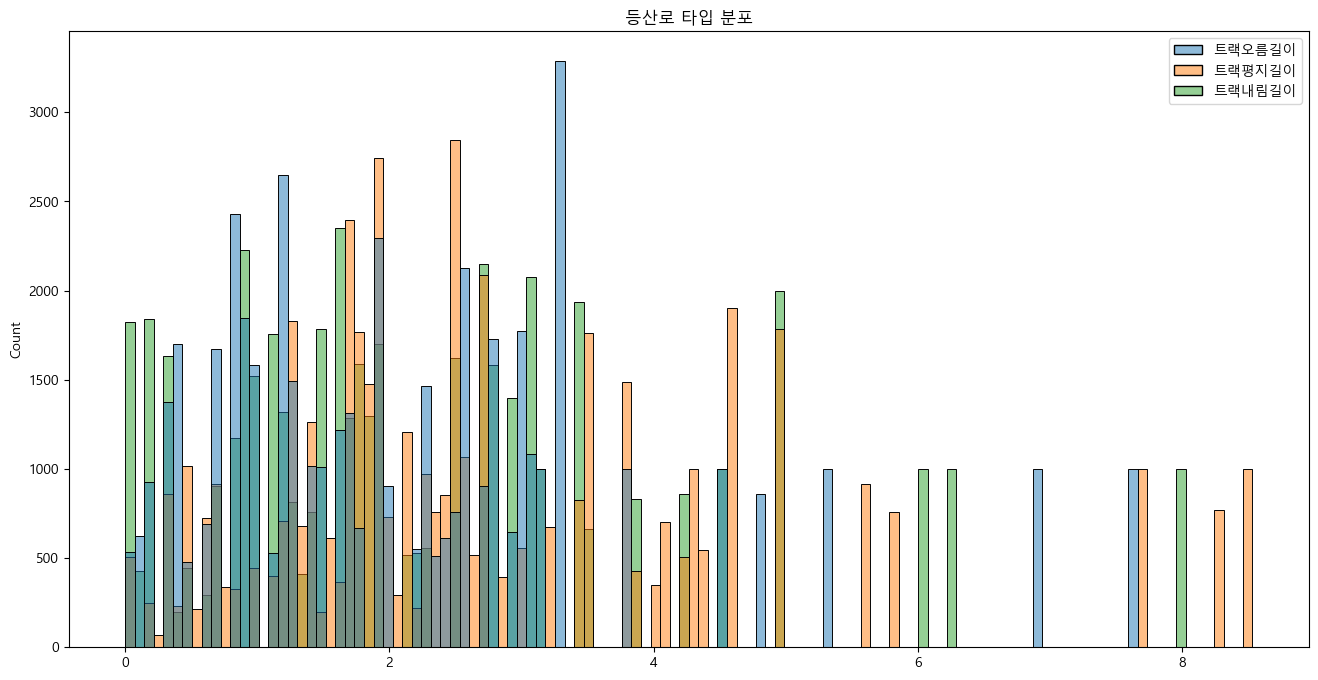

In [149]:
plt.figure(figsize=(16,8))
sns.histplot(data=df[['트랙오름길이', '트랙평지길이', '트랙내림길이']])
plt.title('등산로 타입 분포')

In [150]:
m = folium.Map(location=[37.5519, 126.9918], zoomstart=15)

# 시도별로 다른 색으로 마커를 표시
colors = ['red', 'blue', 'green', 'orange', 'purple', 'darkred', 'darkblue', 'darkgreen', 'cadetblue', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray', 'cadetblue']
color_dict = dict(zip(df['트랙시도명'].unique(), colors))

# 그룹별로 마커 표시
for name, group in df.groupby('트랙시도명'):
    if name in color_dict:  # color_dict에 키가 있는지 확인
        color = color_dict[name]
        for row in group.index[:len(df.index):100]:
            lat = group.loc[row, '트랙시작위치위도']
            lng = group.loc[row, '트랙시작위치경도']
            folium.Marker(location=[lat,lng], icon=folium.Icon(color=color)).add_to(m)
        
m